In [18]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import ks_2samp,kstest
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
for p in [np, pd, scipy, matplotlib]:
    print (p.__name__, p.__version__)

numpy 1.14.0
pandas 0.22.0
scipy 1.0.0
matplotlib 2.2.2


Read the data

In [20]:
data = pd.read_excel("Data.xlsx",header=None)

# Exploratory Data Analysis

In [21]:
print('Number of rows:',data.shape[0])

Number of rows: 267


In [22]:
data.head()

,0
0,1.411603e-110
1,7.313464e-97
2,3.057337e-87
3,1.041993e-79
4,1.443998e-73


Plot histogram of the points

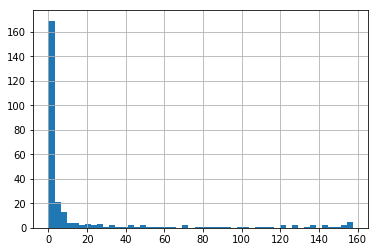

In [23]:
data[0].hist(bins=50)

"zoom in " near zero

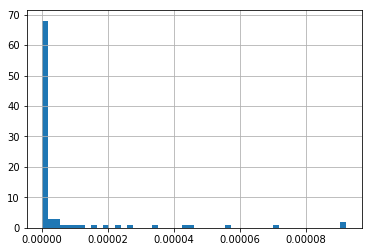

In [24]:
data[0][data[0]<0.0001].hist(bins=50)
# The data is very skewed and positive
# It looks like  the distribution is described by f(x) on even power

In [25]:
# Chek is the distributuin continuous
if data[0].unique().shape[0] == data[0].shape[0]:
    print("The distribution is continuous")

The distribution is continuous


In [26]:
data.describe()
# Main stats about the data

,0
count,2.670000e+02
mean,1.872794e+01
std,4.011884e+01
min,1.411603e-110
25%,1.574194e-06
50%,9.527762e-02
75%,7.756981e+00
max,1.574358e+02


# Reverse engineering

In [27]:
# Try to reverse ingenier the distribution
#try exp. distr
from scipy.stats import exponpow 
b_val,loc_val, scale_val = exponpow.fit(data[0])
kstest(data[0],exponpow(b=b_val,loc=loc_val, scale=scale_val).pdf)

KstestResult(statistic=1.4296174141589204e+22, pvalue=nan)

1.5243754886680794


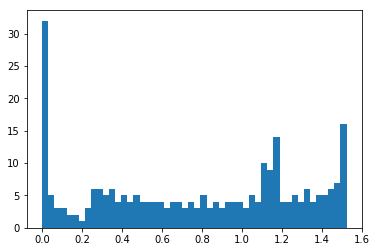

In [28]:
plt.hist(np.power(data[0],1/12),bins=50)
print(np.max(np.power(data[0],1/12)))
# It does not look like the underlying distribution is normal

1.000199424715415


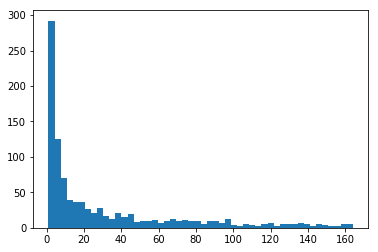

In [29]:
denerated_data = np.power(165,np.random.uniform(size=1000))
_ = plt.hist(denerated_data,bins=50)
print(min(denerated_data))

Min value 5.04989146552334e-32
Mean value 13.101084678833663


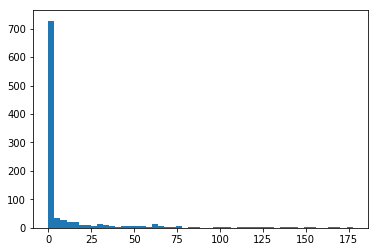

In [30]:
# Generated data from normal distributuin, raise it to a power and plot the result
max_val=1.54
generated_data = np.power(np.random.uniform(high=max_val,size=1000),12)
_ = plt.hist(generated_data,bins=50)
print('Min value',np.min(generated_data))
print('Mean value',np.mean(generated_data))
# Looks similiar but the very small values of the real data are absent

Min value 4.2910361102634826e-12
Mean 2.574477325921458


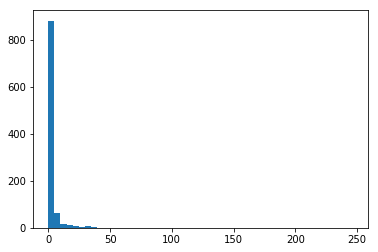

In [31]:
scale = 1
generated_data = np.power(np.random.normal(scale=scale,size=1000),4)
_ = plt.hist(generated_data,bins=50)
print('Min value',np.min(generated_data))
print('Mean',np.mean(generated_data))
# Looks similiar, but the small values of the real data are absent and.
#Furthermore there are big diffrences in the mean

In [32]:
# Try the visual best found fit, (uniform distributuon**(1/12))
m = np.max(np.power(data[0],1/12))
generated_data = np.power(np.random.uniform(high=1.54,size=10000),12)
result = ks_2samp(data[0].as_matrix(),generated_data)
print("p value:",result[1])

p value: 0.007576738552382824


In [33]:
#try p hacking
powers = range(2,20,2)
results = []
for power in powers:
    max_val = np.max(np.power(data[0],1/power))
    generated_data = np.power(np.random.uniform(high=max_val, size=10000), power)
    result = ks_2samp(data[0],generated_data)
    results.append(result[1])
best_power =  powers[result.index(max(result))]
print('Best p value:',max(results))
print('Best power:',best_power)


Best p value: 0.007013344213089247
Best power: 2


In [34]:
# try another 'hack' approach
dist_names = [ 'anglit', 'cauchy',  'expon', 'norm', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'laplace', 'logistic', 'maxwell',    'rayleigh', 'semicircular',  'uniform', 'wald'] 
for dist in  dist_names:
    test_stat = kstest(data[0], dist)
    if test_stat[1] > 0.05:
        print(dist)


There wasn't a succesfull fit to the data